In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from skimage import io
from matplotlib.image import imread
import keras
import time
import cv2
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# Allow image embeding in notebook
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
labels = pd.read_csv("/kaggle/input/vehicle-damage-dataset/train/train/train.csv")
labels.head() 

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5


In [3]:
test_labels = pd.read_csv("/kaggle/input/vehicle-damage-dataset/test/test.csv")
test_labels.head() 

,image_id,filename
0,7201,7201.jpg
1,7202,7202.jpg
2,7203,7203.jpg
3,7204,7204.jpg
4,7205,7205.jpg


In [4]:
labels['label'].nunique()

6

In [5]:
file_paths = [[fname, '/kaggle/input/vehicle-damage-dataset/train/train/images/' + fname] for fname in labels['filename']]

In [6]:
test_file_paths = [[fname, '/kaggle/input/vehicle-damage-dataset/test/images/' + fname] for fname in test_labels['filename']]

In [7]:
test_file_paths

[['7201.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7201.jpg'],
 ['7202.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7202.jpg'],
 ['7203.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7203.jpg'],
 ['7204.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7204.jpg'],
 ['7205.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7205.jpg'],
 ['7206.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7206.jpg'],
 ['7207.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7207.jpg'],
 ['7208.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7208.jpg'],
 ['7209.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7209.jpg'],
 ['7210.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7210.jpg'],
 ['7211.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7211.jpg'],
 ['7212.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7212.jpg'],
 ['7213.jpg', '/kaggle/input/vehicle-damage-dataset/test/images/7213.jpg'],
 ['7214.jpg'

In [8]:
file_paths

[['1.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/1.jpg'],
 ['2.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/2.jpg'],
 ['3.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/3.jpg'],
 ['4.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/4.jpg'],
 ['5.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/5.jpg'],
 ['6.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/6.jpg'],
 ['7.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/7.jpg'],
 ['8.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/8.jpg'],
 ['9.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/9.jpg'],
 ['10.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/10.jpg'],
 ['11.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/11.jpg'],
 ['12.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/12.jpg'],
 ['13.jpg', '/kaggle/input/vehicle-damage-dataset/train/train/images/1

In [9]:
if len(labels) == len(file_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  7200 matches the number of filenames i.e.  7200


In [10]:
test_images = pd.DataFrame(test_file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,7201.jpg,/kaggle/input/vehicle-damage-dataset/test/images/7201.jpg
1,7202.jpg,/kaggle/input/vehicle-damage-dataset/test/images/7202.jpg
2,7203.jpg,/kaggle/input/vehicle-damage-dataset/test/images/7203.jpg
3,7204.jpg,/kaggle/input/vehicle-damage-dataset/test/images/7204.jpg
4,7205.jpg,/kaggle/input/vehicle-damage-dataset/test/images/7205.jpg


In [11]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,1.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/1.jpg
1,2.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/2.jpg
2,3.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/3.jpg
3,4.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/4.jpg
4,5.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/5.jpg


In [12]:
# final_test_data = pd.merge(test_images, labels, how = 'inner', on = 'filename').set_index('image_id')
# final_test_data.head()

In [13]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename').set_index('image_id')
train_data.head()

,filename,filepaths,label
image_id,,,
1,1.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/1.jpg,2
2,2.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/2.jpg,4
3,3.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/3.jpg,2
4,4.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/4.jpg,3
5,5.jpg,/kaggle/input/vehicle-damage-dataset/train/train/images/5.jpg,5


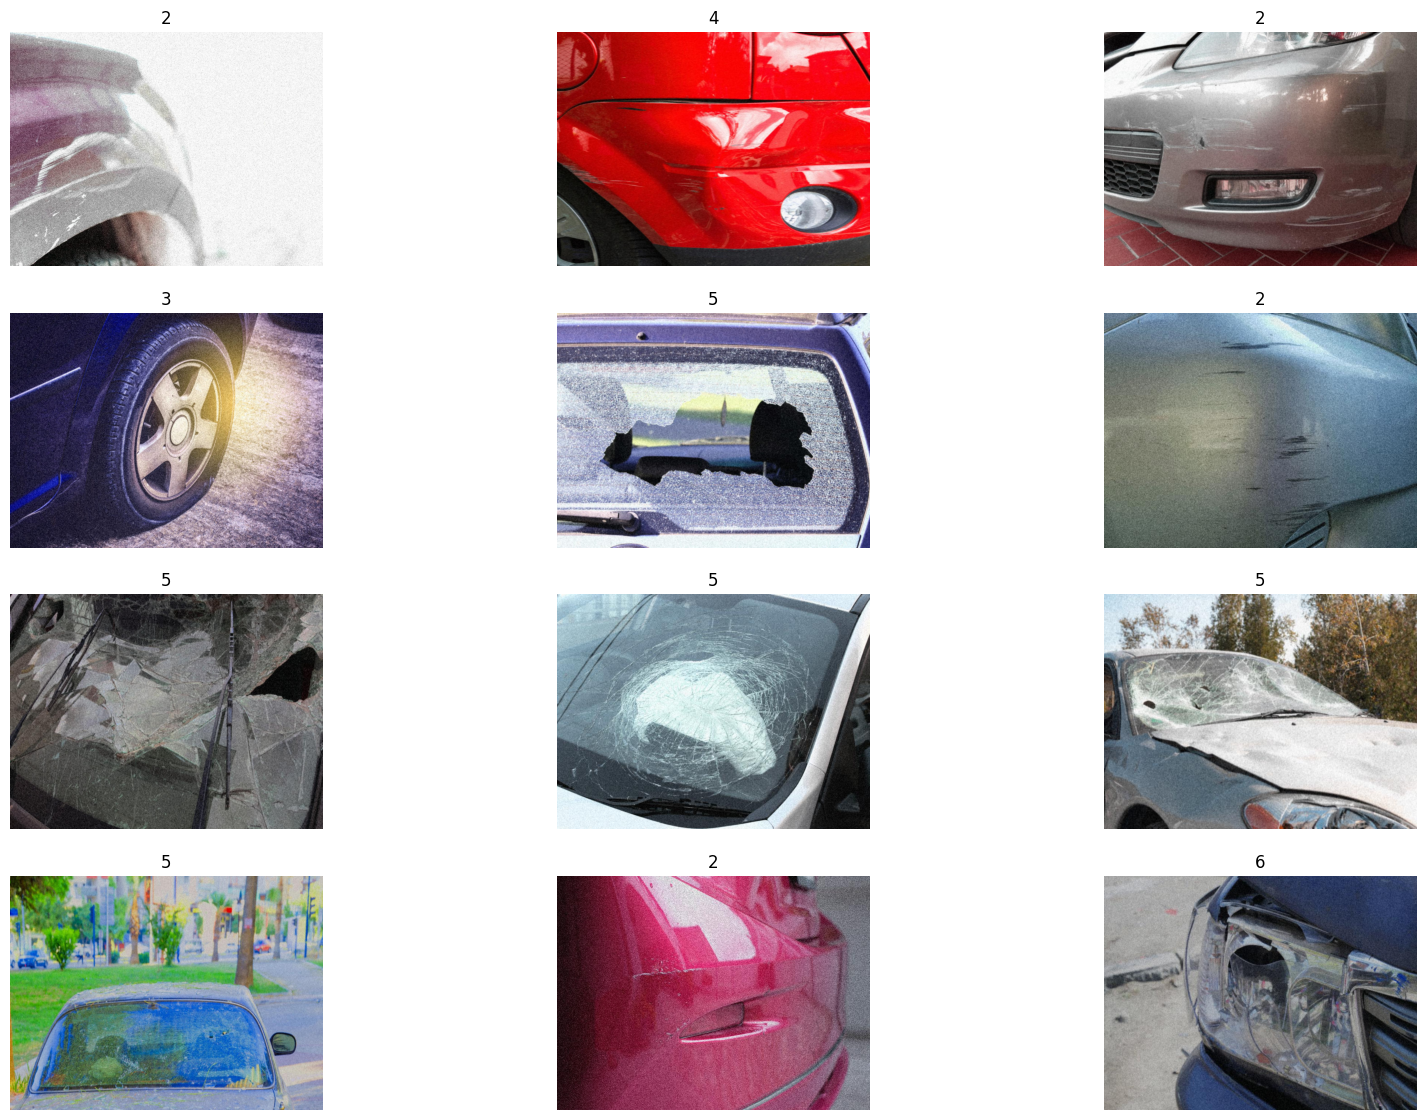

In [14]:
fig, axis = plt.subplots(4, 3,figsize=(20, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(plt.imread(train_data.filepaths[i+1]))
    ax.set_title(train_data.label[i+1])
    ax.axis('off')
    
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
test_df = test_images['filepaths']

In [17]:
test_df.head()

0    /kaggle/input/vehicle-damage-dataset/test/images/7201.jpg
1    /kaggle/input/vehicle-damage-dataset/test/images/7202.jpg
2    /kaggle/input/vehicle-damage-dataset/test/images/7203.jpg
3    /kaggle/input/vehicle-damage-dataset/test/images/7204.jpg
4    /kaggle/input/vehicle-damage-dataset/test/images/7205.jpg
Name: filepaths, dtype: object

In [18]:
test_df = pd.DataFrame(test_df, columns=['filepaths'])

In [19]:
test_df.head()

,filepaths
0,/kaggle/input/vehicle-damage-dataset/test/images/7201.jpg
1,/kaggle/input/vehicle-damage-dataset/test/images/7202.jpg
2,/kaggle/input/vehicle-damage-dataset/test/images/7203.jpg
3,/kaggle/input/vehicle-damage-dataset/test/images/7204.jpg
4,/kaggle/input/vehicle-damage-dataset/test/images/7205.jpg


In [20]:
df = train_data[['filepaths', 'label']]

In [21]:
df.head()

,filepaths,label
image_id,,
1,/kaggle/input/vehicle-damage-dataset/train/train/images/1.jpg,2
2,/kaggle/input/vehicle-damage-dataset/train/train/images/2.jpg,4
3,/kaggle/input/vehicle-damage-dataset/train/train/images/3.jpg,2
4,/kaggle/input/vehicle-damage-dataset/train/train/images/4.jpg,3
5,/kaggle/input/vehicle-damage-dataset/train/train/images/5.jpg,5


In [22]:
df['label'] = df['label'].astype('object')

In [23]:
df['label']

image_id
1       2
2       4
3       2
4       3
5       5
       ..
7196    4
7197    4
7198    4
7199    2
7200    2
Name: label, Length: 7200, dtype: object

In [24]:
df["label"]=df["label"].apply(lambda x:str(x).split(","))

In [25]:
df['label']

image_id
1       [2]
2       [4]
3       [2]
4       [3]
5       [5]
       ... 
7196    [4]
7197    [4]
7198    [4]
7199    [2]
7200    [2]
Name: label, Length: 7200, dtype: object

In [26]:
test_ratio = 0.15

train, test = train_test_split(df, test_size=test_ratio, random_state=101)
len(train), len(test)

(6120, 1080)

In [27]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.4, horizontal_flip=True, rescale=1/255,)

In [29]:
test_data_gen = ImageDataGenerator(rescale=1/255)

In [30]:
final_test_data_gen = ImageDataGenerator(rescale=1/255)

In [31]:
image_shape = (299, 299, 3)

In [32]:
training_set = train_data_gen.flow_from_dataframe(dataframe=train, x_col="filepaths", y_col="label", target_size=image_shape[:2], class_mode='categorical', batch_size=64, )
testing_set = test_data_gen.flow_from_dataframe(dataframe=test, x_col="filepaths", y_col="label", target_size=image_shape[:2], class_mode='categorical', batch_size=64, shuffle=False)

Found 6120 validated image filenames belonging to 6 classes.
Found 1080 validated image filenames belonging to 6 classes.


In [33]:
final_testing_set = final_test_data_gen.flow_from_dataframe(dataframe=test_df, directory="/kaggle/input/vehicle-damage-dataset/test/images", x_col="filepaths", target_size=image_shape[:2], class_mode=None, batch_size=64, shuffle=False)

Found 4800 validated image filenames.


In [34]:
training_set.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5}

<h2> AlexNet </h2>

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 96, kernel_size=(11,11), strides = (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation="softmax")
])

In [36]:
early_stop = [EarlyStopping(monitor='val_loss', patience=5, verbose=2)]

In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [80]:
model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set, )

Epoch 1/100
96/96 [==============================] - 231s 2s/step - loss: 8.8438 - accuracy: 0.2858 - recall: 0.2194 - val_loss: 1.6486 - val_accuracy: 0.2185 - val_recall: 0.0083
Epoch 2/100
96/96 [==============================] - 173s 2s/step - loss: 1.6620 - accuracy: 0.3291 - recall: 0.1297 - val_loss: 1.4990 - val_accuracy: 0.3657 - val_recall: 0.0093
Epoch 3/100
96/96 [==============================] - 172s 2s/step - loss: 1.5471 - accuracy: 0.3608 - recall: 0.1315 - val_loss: 1.4990 - val_accuracy: 0.3602 - val_recall: 0.0463
Epoch 4/100
96/96 [==============================] - 165s 2s/step - loss: 1.5109 - accuracy: 0.3810 - recall: 0.1505 - val_loss: 1.5028 - val_accuracy: 0.3231 - val_recall: 0.0167
Epoch 5/100
96/96 [==============================] - 165s 2s/step - loss: 1.4908 - accuracy: 0.3822 - recall: 0.1618 - val_loss: 1.6272 - val_accuracy: 0.3176 - val_recall: 0.0287
Epoch 6/100
96/96 [==============================] - 165s 2s/step - loss: 1.4686 - accuracy: 0.3856 

<h2>Resnet
</h2>

In [43]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0

In [44]:
effnet = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(299,299,3), pooling='max')

24274472/24274472 [==============================] - 2s 0us/step


In [45]:
# resnet420.summary()

In [46]:
model = tf.keras.Sequential()

# only do this when you are using pre trained weights.
for layer in model.layers:
    layer.trainable=False

# adding fully connected layers
model.add(effnet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               163968    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 6084054 (23.21 MB)
Trainable params: 6023446 (22.98 MB)
Non-trainable params: 60608 (236.75 KB)
__________

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(training_set, batch_size=16, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

Epoch 1/100


2023-12-03 12:56:32.023573: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetv2-b0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


96/96 [==============================] - 239s 2s/step - loss: 1.6656 - accuracy: 0.3768 - val_loss: 1.7228 - val_accuracy: 0.3167
Epoch 2/100
96/96 [==============================] - 166s 2s/step - loss: 1.1952 - accuracy: 0.4856 - val_loss: 2.0192 - val_accuracy: 0.3167
Epoch 3/100
96/96 [==============================] - 167s 2s/step - loss: 1.0401 - accuracy: 0.5636 - val_loss: 1.9521 - val_accuracy: 0.3204
Epoch 4/100
96/96 [==============================] - 166s 2s/step - loss: 0.9131 - accuracy: 0.6324 - val_loss: 0.9198 - val_accuracy: 0.6102
Epoch 5/100
96/96 [==============================] - 157s 2s/step - loss: 0.8265 - accuracy: 0.6739 - val_loss: 1.3229 - val_accuracy: 0.4972
Epoch 6/100
96/96 [==============================] - 157s 2s/step - loss: 0.7352 - accuracy: 0.7186 - val_loss: 2.0851 - val_accuracy: 0.3537
Epoch 7/100
96/96 [==============================] - 158s 2s/step - loss: 0.6294 - accuracy: 0.7611 - val_loss: 1.2609 - val_accuracy: 0.5602
Epoch 8/100
96/96 

<h2>ResnetRS

In [91]:
from tensorflow.keras.applications.resnet_rs import ResNetRS200

In [93]:
resnet200 = ResNetRS200(include_top=False, weights='imagenet', input_shape=(299,299,3), pooling='avg')

In [94]:
for layer in resnet200.layers:
    layer.trainable = False

In [95]:
model = Sequential()
model.add(resnet_v2)

model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 dense_17 (Dense)            (None, 128)               262272    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 58628486 (223.65 MB)
Trainable params: 296838 (1.13 MB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [96]:
model.compile(optimizer = 'adam',
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [97]:
model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

Epoch 1/100
96/96 [==============================] - 181s 2s/step - loss: 0.9604 - accuracy: 0.6410 - val_loss: 0.5943 - val_accuracy: 0.7602
Epoch 2/100
96/96 [==============================] - 163s 2s/step - loss: 0.7009 - accuracy: 0.7255 - val_loss: 0.5761 - val_accuracy: 0.7704
Epoch 3/100
96/96 [==============================] - 164s 2s/step - loss: 0.6449 - accuracy: 0.7510 - val_loss: 0.5315 - val_accuracy: 0.7833
Epoch 4/100
96/96 [==============================] - 163s 2s/step - loss: 0.6193 - accuracy: 0.7606 - val_loss: 0.6749 - val_accuracy: 0.7556
Epoch 5/100
96/96 [==============================] - 163s 2s/step - loss: 0.6126 - accuracy: 0.7637 - val_loss: 0.5302 - val_accuracy: 0.7954
Epoch 6/100
96/96 [==============================] - 164s 2s/step - loss: 0.5795 - accuracy: 0.7750 - val_loss: 0.5062 - val_accuracy: 0.7991
Epoch 7/100
96/96 [==============================] - 164s 2s/step - loss: 0.5575 - accuracy: 0.7869 - val_loss: 0.4534 - val_accuracy: 0.8222
Epoch 

<h2>Resnet50

In [50]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [51]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(299,299,3), pooling='max')

94765736/94765736 [==============================] - 4s 0us/step


In [52]:
model = tf.keras.Sequential()

# only do this when you are using pre trained weights.
for layer in model.layers:
    layer.trainable=False

# adding fully connected layers
model.add(resnet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               262272    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 23850758 (90.98 MB)
Trainable params: 23797638 (90.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

Epoch 1/100
96/96 [==============================] - 206s 2s/step - loss: 2.7584 - accuracy: 0.4078 - val_loss: 1.7670 - val_accuracy: 0.3102
Epoch 2/100
96/96 [==============================] - 163s 2s/step - loss: 1.1934 - accuracy: 0.5157 - val_loss: 1.8852 - val_accuracy: 0.3167
Epoch 3/100
96/96 [==============================] - 165s 2s/step - loss: 1.1343 - accuracy: 0.5395 - val_loss: 2.1145 - val_accuracy: 0.3167
Epoch 4/100
96/96 [==============================] - 165s 2s/step - loss: 1.1646 - accuracy: 0.5324 - val_loss: 1.8022 - val_accuracy: 0.3167
Epoch 5/100
96/96 [==============================] - 161s 2s/step - loss: 1.0150 - accuracy: 0.5961 - val_loss: 1.8446 - val_accuracy: 0.3167
Epoch 6/100
96/96 [==============================] - 163s 2s/step - loss: 0.9394 - accuracy: 0.6374 - val_loss: 2.0760 - val_accuracy: 0.3287
Epoch 6: early stopping


<h2>DenseNet

In [58]:
from tensorflow.keras.applications import DenseNet121

In [59]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(299,299,3))

In [60]:
model = tf.keras.Sequential()

# only do this when you are using pre trained weights.
for layer in model.layers:
    layer.trainable=False

# adding fully connected layers
model.add(densenet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 9, 9, 1024)        7037504   
                                                                 
 flatten_4 (Flatten)         (None, 82944)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               10616960  
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 6)                 774       
                                                                 
Total params: 17655238 (67.35 MB)
Trainable params: 17571590 (67.03 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model.fit(training_set, batch_size=32, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_4/densenet121/pool4_conv/Conv2D' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_47/4041874212.py", line 1, in <module>
      model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set,)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_4/densenet121/pool4_conv/Conv2D'
OOM when allocating tensor with shape[64,512,18,18] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_4/densenet121/pool4_conv/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_191719]

<h2>ResNet152V2

In [70]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2

In [71]:
resnet_v2 = ResNet152V2(weights= 'imagenet', include_top=False, pooling='avg')

In [73]:
for layer in resnet_v2.layers:
    layer.trainable = False
    
# resnet_v2.summary() 

In [74]:
model = Sequential()
model.add(resnet_v2)

model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 dense_14 (Dense)            (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 58628486 (223.65 MB)
Trainable params: 296838 (1.13 MB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [75]:
model.compile(optimizer = 'adam',
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [76]:
model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

Epoch 1/100
96/96 [==============================] - 180s 2s/step - loss: 0.9403 - accuracy: 0.6459 - val_loss: 0.5839 - val_accuracy: 0.7778
Epoch 2/100
96/96 [==============================] - 161s 2s/step - loss: 0.6871 - accuracy: 0.7366 - val_loss: 0.5409 - val_accuracy: 0.7870
Epoch 3/100
96/96 [==============================] - 160s 2s/step - loss: 0.6349 - accuracy: 0.7523 - val_loss: 0.5475 - val_accuracy: 0.7907
Epoch 4/100
96/96 [==============================] - 161s 2s/step - loss: 0.5992 - accuracy: 0.7703 - val_loss: 0.5352 - val_accuracy: 0.7935
Epoch 5/100
96/96 [==============================] - 163s 2s/step - loss: 0.5705 - accuracy: 0.7804 - val_loss: 0.4872 - val_accuracy: 0.8037
Epoch 6/100
96/96 [==============================] - 162s 2s/step - loss: 0.5755 - accuracy: 0.7761 - val_loss: 0.4971 - val_accuracy: 0.8093
Epoch 7/100
96/96 [==============================] - 163s 2s/step - loss: 0.5653 - accuracy: 0.7817 - val_loss: 0.4551 - val_accuracy: 0.8204
Epoch 

<h2>VGG19
</h2>

In [86]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(299,299,3), pooling='max')
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [87]:
model = tf.keras.Sequential()

# only do this when you are using pre trained weights.
for layer in model.layers:
    layer.trainable=False

# adding fully connected layers
model.add(vgg)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 20189382 (77.02 MB)
Trainable params: 20

In [88]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [89]:
model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

Epoch 1/100
96/96 [==============================] - 255s 2s/step - loss: 1.6174 - accuracy: 0.3093 - recall: 0.0059 - val_loss: 1.5683 - val_accuracy: 0.3167 - val_recall: 0.0000e+00
Epoch 2/100
96/96 [==============================] - 179s 2s/step - loss: 1.5739 - accuracy: 0.3194 - recall: 3.2680e-04 - val_loss: 1.5612 - val_accuracy: 0.3102 - val_recall: 0.0000e+00
Epoch 3/100
96/96 [==============================] - 177s 2s/step - loss: 1.5715 - accuracy: 0.3167 - recall: 0.0018 - val_loss: 1.5644 - val_accuracy: 0.3167 - val_recall: 0.0000e+00
Epoch 4/100
96/96 [==============================] - 179s 2s/step - loss: 1.5712 - accuracy: 0.3172 - recall: 3.2680e-04 - val_loss: 1.5635 - val_accuracy: 0.3167 - val_recall: 0.0000e+00
Epoch 5/100
96/96 [==============================] - 178s 2s/step - loss: 1.5674 - accuracy: 0.3212 - recall: 0.0000e+00 - val_loss: 1.5627 - val_accuracy: 0.3167 - val_recall: 0.0000e+00
Epoch 6/100
96/96 [==============================] - 176s 2s/step - 

<h2>Inception V3


In [132]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(500, 500, 3))

In [133]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv2d_99 (Conv2D)          (None, 249, 249, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_99 (Ba  (None, 249, 249, 32)         96        ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 249, 249, 32)         0         ['batch_normalizati

In [134]:
model = Sequential()
model.add(i_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 14, 14, 2048)      21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 22328870 (85.18 MB)
Trainable params: 526086 (2.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [135]:
model.compile(optimizer = 'adam',
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
model.fit(training_set, batch_size=64, epochs=100, callbacks=[early_stop], validation_data=testing_set,)

In [95]:
model.save('inception_classifier.h5')

In [98]:
pred = model.predict(testing_set)

17/17 [==============================] - 11s 490ms/step


In [99]:
preds = np.argmax(pred, axis=1)

In [100]:
preds

array([2, 2, 3, ..., 4, 1, 2])

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(testing_set.classes, preds))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        24
           1       0.79      0.84      0.81       342
           2       0.89      0.98      0.93        93
           3       0.80      0.80      0.80       335
           4       0.98      0.98      0.98       162
           5       0.85      0.60      0.71       124

    accuracy                           0.83      1080
   macro avg       0.83      0.84      0.83      1080
weighted avg       0.83      0.83      0.83      1080



In [103]:
final_pred = model.predict(final_testing_set)

75/75 [==============================] - 45s 568ms/step


In [104]:
final_pred

array([[8.22244398e-03, 8.88611525e-02, 2.78010248e-06, 6.05628550e-01,
        1.51674714e-04, 2.97133386e-01],
       [1.06046356e-01, 4.58005756e-01, 5.35948027e-04, 1.00138225e-01,
        2.92732002e-04, 3.34980965e-01],
       [5.84150956e-04, 9.82986927e-01, 2.76489658e-07, 1.60350408e-02,
        3.65562045e-07, 3.93223425e-04],
       ...,
       [3.75248608e-04, 5.36873102e-01, 1.33477161e-02, 4.18756068e-01,
        1.16830688e-05, 3.06362640e-02],
       [3.10189032e-04, 9.97416377e-01, 2.30140754e-10, 1.65039324e-03,
        2.77882748e-08, 6.23047003e-04],
       [2.82819450e-01, 3.01748037e-01, 2.02040198e-07, 4.07200575e-01,
        1.41771155e-08, 8.23173486e-03]], dtype=float32)

In [105]:
final_preds = np.argmax(final_pred, axis=1)

In [106]:
final_preds = final_preds + 1

In [107]:
sub_df = pd.read_csv('/kaggle/input/vehicle-damage-dataset/test/test.csv')

In [108]:
sub_df.head()

,image_id,filename
0,7201,7201.jpg
1,7202,7202.jpg
2,7203,7203.jpg
3,7204,7204.jpg
4,7205,7205.jpg


In [109]:
sub_df['label'] = final_preds

In [111]:
sub_df[['image_id', 'label']].to_csv('resnetrs.csv', index=False)